## Entrenar el modelo de Deep Learning

## Paso 1:
- Cargar los datos previamente procesados

In [1]:
# Carga de las librerias necesarias
import os
import numpy as np
import cv2
import gc

In [2]:
# Cargar la data preprocesada
data = np.load('./Data/data_preprocesada_v1.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((9477, 100, 100, 3), (9477,))

## Paso 2:
- Preprosesar "y"

In [5]:
np.unique(y)

array(['WithMask', 'WithoutMask'], dtype='<U11')

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [8]:
y_array = y_onehot.toarray()

In [9]:
y_array.shape

(9477, 2)

## Paso 3:
- Separar los datos en sets de entrenamiento y test respectivamente

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array, test_size=0.2, random_state=42)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7581, 100, 100, 3), (1896, 100, 100, 3), (7581, 2), (1896, 2))

## Paso 4:
- Diseno y creacion del modelo de Deep Learning

In [1]:
# Importar las librerias necesarias para la creacion del modelo
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [13]:
# Diseñar la estuctura de la red neuronal convolucional

model = Sequential([
    layers.Conv2D(16,3,padding='same', input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(28,activation='relu'),
    layers.Dense(2,activation='sigmoid')
])

# Compilar el modelo de red neuronal convolucional. Configurar el optimizador "Adam" y la función de pérdida
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [17]:
##model = Sequential([
##    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
##    layers.MaxPooling2D(pool_size=(2, 2)),
##    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
##    layers.MaxPooling2D(pool_size=(2, 2)),
##    layers.Flatten(),
##    layers.Dense(units=128, activation='relu'),
##    layers.Dense(units=2, activation='softmax')
##])
##
### compile the model with Adam optimizer and categorical cross-entropy loss function
##model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
##              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [15]:
# Entrenar la red Neuronal con los parametros necesarios
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10)

Epoch 1/10
253/253 [==============================] - 50s 191ms/step - loss: 0.2442 - accuracy: 0.9025 - val_loss: 0.1013 - val_accuracy: 0.9615
Epoch 2/10
253/253 [==============================] - 47s 185ms/step - loss: 0.1035 - accuracy: 0.9604 - val_loss: 0.0572 - val_accuracy: 0.9847
Epoch 3/10
253/253 [==============================] - 46s 184ms/step - loss: 0.0705 - accuracy: 0.9728 - val_loss: 0.0565 - val_accuracy: 0.9757
Epoch 4/10
253/253 [==============================] - 48s 188ms/step - loss: 0.0599 - accuracy: 0.9772 - val_loss: 0.0425 - val_accuracy: 0.9858
Epoch 5/10
253/253 [==============================] - 49s 192ms/step - loss: 0.0437 - accuracy: 0.9827 - val_loss: 0.0367 - val_accuracy: 0.9858
Epoch 6/10
253/253 [==============================] - 45s 179ms/step - loss: 0.0396 - accuracy: 0.9854 - val_loss: 0.0451 - val_accuracy: 0.9810
Epoch 7/10
253/253 [==============================] - 50s 196ms/step - loss: 0.0337 - accuracy: 0.9863 - val_loss: 0.0307 - val_ac

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Crear la tabla con los datos de perdida y presicion
history_df = pd.DataFrame(history.history)

In [18]:
# Mostrar la tabla con los datos de perdida y presicion
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.244235,0.902519,0.101292,0.961498
1,0.103481,0.960427,0.057244,0.984705
2,0.070541,0.972827,0.056453,0.975738
3,0.059881,0.977180,0.042489,0.985759
4,0.043730,0.982720,0.036656,0.985759
5,0.039629,0.985358,0.045082,0.981013
6,0.033695,0.986282,0.030682,0.988924
7,0.029054,0.989315,0.030717,0.988397
8,0.025076,0.989315,0.025316,0.991034
9,0.020359,0.992085,0.023100,0.993143


<function matplotlib.pyplot.show(close=None, block=None)>

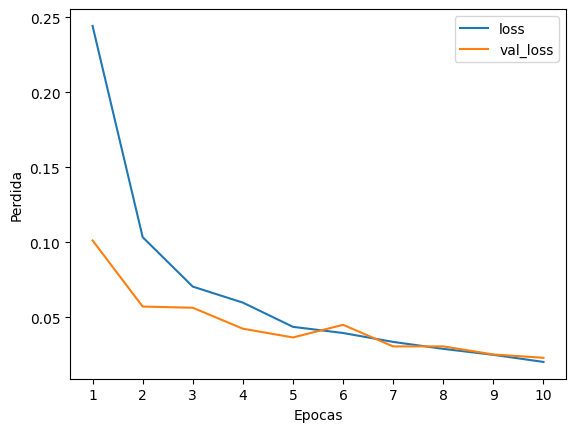

In [19]:
# Grafica de Perdida vs epocas
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

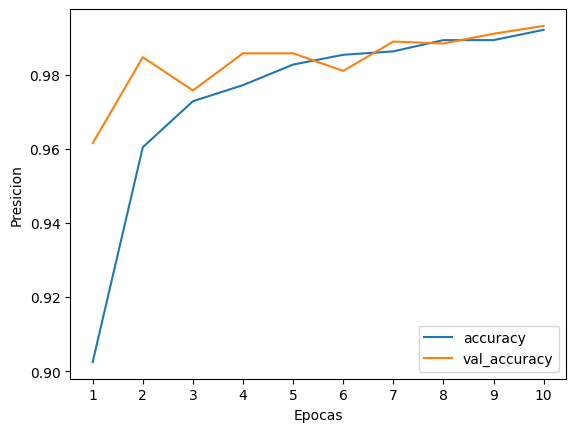

In [20]:
# Grafica de Presicion vs epocas
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epocas')
plt.ylabel('Presicion')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show

In [21]:
# Guardar el modelo diseñado
model.save('modelo_cnn_deteccion_mascarillas_AG_MT_V3')

INFO:tensorflow:Assets written to: modelo_cnn_deteccion_mascarillas_AG_MT_V3\assets


INFO:tensorflow:Assets written to: modelo_cnn_deteccion_mascarillas_AG_MT_V3\assets
